Scikit-learn perusteet
======================
![Scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1280px-Scikit_learn_logo_small.svg.png "Scikit-learn")

Asentaaksesi tarvittavat paketit omalla koneellasi harjoituksen suorittamista varten:
```
$ pip3 install scikit-learn pandas imbalanced-learn
```

## Motivointia
Tämän nopean demon tarkoitus on näyttää miten helposti ja nopeasti kirjaston avulla saa suoritettua suoritettua 
yksinkertaisen luokittelun.

In [596]:
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

X, y = make_classification(n_samples=1000, n_features=4, n_classes=3, n_informative=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = X[:50], X[50:], y[:50], y[50:]
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["class A", "class B", "class C"])
score = accuracy_score(y_test, y_pred)
print("Luokittelun OA: {:.2f}".format(score))
print("Luokitteluraportti (PA=precision, UA=recall) :\n", report)

Luokittelun OA: 0.84
Luokitteluraportti (PA=precision, UA=recall) :
               precision    recall  f1-score   support

     class A       0.95      0.78      0.85       314
     class B       0.95      0.81      0.88       319
     class C       0.71      0.94      0.80       317

    accuracy                           0.84       950
   macro avg       0.87      0.84      0.85       950
weighted avg       0.87      0.84      0.85       950



/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Aineiston lataaminen
Suurin osa Pythonin koneoppimiskirjastoista tukee:
- Numpy Array
- Pandas 
- listat

Scikit-learn -kirjastossa on myös monia valmiita aineistoja algoritmien ja käsittelyketjujen testaamista varten moduulissa
`sklearn.datasets`. 

Lataa aluksi klassinen jo edellisessä harjoituksessa tutuksi tullut [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)-aineisto.
Käytä hyväksi [datasets-dokumentaatiota](https://scikit-learn.org/stable/datasets/index.html).

In [597]:
from sklearn import datasets

# Lataa Iris-aineisto
dataset = datasets.load_iris() #TODO: None

print(dataset.DESCR)
print("Firt 5 rows:\n", dataset.data[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Havainnot ovat dataset-olion data-kentässä ja niiden luokat taas olion target-kentässä. 
Tyypillisesti havaintoja merkitään (isolla) kirjaimella `X` ja luokkia kirjaimella `y`.

In [598]:
y = dataset.target
X = dataset.data 
print("Ensimmäisellä havainnolla y:",y[0], "ja X:", X[0])

Ensimmäisellä havainnolla y: 0 ja X: [5.1 3.5 1.4 0.2]


Useimmiten aineiston joutuu kuitenkin lataamaan muulla tavalla, esimerkiksi CSV- tai HDF5-tiedostosta levyltä tai internetin yli esimerkiksi AWS S3:n sisältä. 
Tähän (ja niiiin moneen muuhun) [pandas](https://pandas.pydata.org) on oiva apuväline. 
Kirjoita dataset-olio csv-tiedostoksi ja lue se. Käytä hyväksesi [dokumentaatiota](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 

In [599]:
import pandas as pd

#Tyypillisesti pandas DataFrame-oliot nimetään df-nimellä
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
# Tyypillisesti luokat ovat ensimmäisessä sarakkeessa
df = df[["target"] + dataset.feature_names]
df.to_csv("iris_dataset.csv", sep=';', index=False)

# Lue aineisto levyltä
df = pd.read_csv("iris_dataset.csv", sep=';') #TODO: None

Nyt voit muodostaa havaintovektorin `X` ja luokat `y`.

In [600]:
y = df["target"] # huom: df["target"] on sama kuin df.target
X = df[dataset.feature_names]
print("Ensimmäisellä havainnolla y:",y.loc[0], "ja X:", X.loc[0])

Ensimmäisellä havainnolla y: 0 ja X: sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64


Useimmiten kuitenkaan sarakkeiden nimet eivät ole tiedossa, joten järkevämpää on käyttää sarakkeiden numeroita.
Käytä hyväksesi [dokumentaatiota](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [601]:
#TODO: None
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

## Aineiston jakaminen
Scikit-learn mahdollistaa monia eri tapoja jakaa aineisto opetus- ja testijoukkoihin. Perinteisin tapa on käyttää 
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-funktiota. 

Jaa luomasi `X` ja luokat `y` opetus- ja testijoukkoihin `X_train, X_test, y_train` ja  `y_test` siten, että 
testijoukon osuus on 20% ja opetusjoukon osuus on 80% havainnoista. 

In [602]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # TODO: None

Yksi tapa varmistaa, että havainnot jakautuvat luokkiensa puolesta tasaisesti opeus- ja testijoukkoihin on käyttää moduulia 
[`StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).
Perinteisimmin sitä käytetään ristivalidoinnin yhteydessä.

In [603]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
train_index, test_index = next(sss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


## Aineiston esikäsittely
Aineistolle on usein tarve tehdä muutamia esikäsittelyvaiheita tilanteesta riippuen.

#### Standardointi
Aineistoa on usein hyvä standardoida ennen käyttöä. Tähän voi käyttää prosessointityökalua [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Standardointi suoritetaan opetusjoukon mukaan, mutta samaa oliota sovelletaan myös testausjoukon kanssa. 

In [604]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# TODO: None
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#### Havaintovektoreiden muuttujien määrän vähentäminen
Muuttujien määrän voidaan vähentää pääkomponenttianalyysin avulla [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
Tällöin havaintovektoreiden alkuperäiset muuttujat korvataan pääkomponenttianalyysin luomilla ominaisvektoreilla.
Tämä välivaihe suoritetaan tyypillisesti vain, jos algoritmien opettaminen olisi muuten liian hidasta.

Luo PCA-olio, siten, että pääkomponentit selittää 90% havaintojen varianssista 


In [605]:
from sklearn.decomposition import PCA
# TODO: None
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
print("Muuttujien määrä oli ennen 4, nyt se on ", len(X_train[0]))

# TODO: [kuvaaja](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Muuttujien määrä oli ennen 4, nyt se on  3


Visualisoi vielä opetusjoukkoa kahden ensimmäisen PCA:n luomaa ominaisvektoria käyttäen

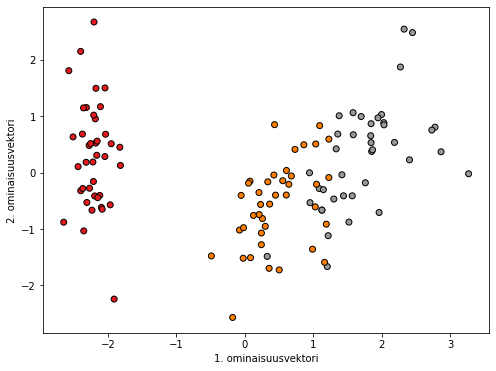

In [606]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
ax.set_xlabel('1. ominaisuusvektori')
ax.set_ylabel('2. ominaisuusvektori')
plt.show()

Aineiston esikäsittelyn yhteydessä suoritettiin opetusjoukolle standardointi ja pääkomponenttianalyysi muuttujien vähentämiseksi.
Samat vaiheet suoritetaan nyt myös testausjoukolle. Tämä vaihe suoritetaan tyypillisesti vasta opettamisen jälkeen.

In [ ]:
# TODO: None
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)


## Luokittelu

### Opettaminen
Luo opetettu malli käyttäen algoritmia [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
# Luo malli haluamillasi parametreilla ja 

Opeta [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
# Luo malli haluamillasi parametreilla ja 
#TODO: None
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train)

Opeta [RF](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
# Luo malli haluamillasi parametreilla ja 

### Testaaminen


### Hyperparametrien optimointi



## Regressio




## Edistyksellisempää -> ehkä toiseen notebookiin?

## Pipelines

## Imbalanced learn

## probaproba!